# Topographic Map from XYZ coordinates

:::{admonition} Course Website
[link to webster](http://54.243.252.9/ce-3372-webroot/)
:::

Making a topographic map from arbitrary XYZ coordinates (useful for when we don't have data in a usable coordinate reference system).

## Workflow

This lesson would apply to the instance where you may wish to perform cut-and-fill type design.  A typical workflow could be:

1. Obtain XYZ coordinates in some known cartesian system.
2. Identify points outside the study area (this is vital for gridding).  If you dont have any data outside, extend using the known values and slopes in sueful directions to build a data hull that covers the study area plus some added boundary around that area.
3. Organize into an ASCII file with XYZ structure, one record for each ordered triple.
4. Apply a suitable gridding tool (inverse distance is always a choice, but is kind of crummy for most topography applications).
5. Grid the data.
6. Generate a topographic map.
7. Export the gridded data for possible inclusion in a GIS map (you will need to do a coordinate transformation, so spatial units are important)

## Example

Figure 1 is a subdivision conceptual map for Somewhere, USA. The numbers on the map are land surface elevations located at the decimal points in the drawing. Along the bottom edge of the map is a black line segment (with arrowheads at each end) that indicates a distance of 1,100 feet on the map. The black circle in the lower left hand corner is to be used as an origin for X-Y measurements for making XYZ data files.

<img src="http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/SomewhereUSABaseMap.png" width="900" ><br>

**Figure 1.  Somewhere USA Study Area**

Water systems design involve design of a water distribution, stormwater collection, and/or wastewater collection system for a study area. All such systems will be influenced by the local topography, so a first step is to build a topographic map to guide design decisions. 

:::{note}
The .png file is [http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/SomewhereUSABaseMap.png](http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/SomewhereUSABaseMap.png) so you can render a larger graphic if needed.
:::

To construct a topographic contour map of the area:

1. Use the indicated origin and find X,Y, and Z coordinates for each displayed elevation. Include example measurements for one or two points (as if someone else would have to check your work)
2. Arrange those coordinates into an ASCII (text) file where each row of the file is a coordinate triple. (See the example at bottom of this document)
3. Use the ASCII file to make a topographic map 

:::{note}
The software choice is yours; you can always use [http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/](http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/) if you wish.  The credentials are username==`TTUStudent` password==`id10t` 
:::

4. Overlay the topographic map onto the base map (the script below requires analyst trial-and-error to get the plot windows to align nicely) 
5. Export the XYZ grid to ascii for GIS uses (need to fix coordinate system to a georeferenced origin (this step is not illustrated below)

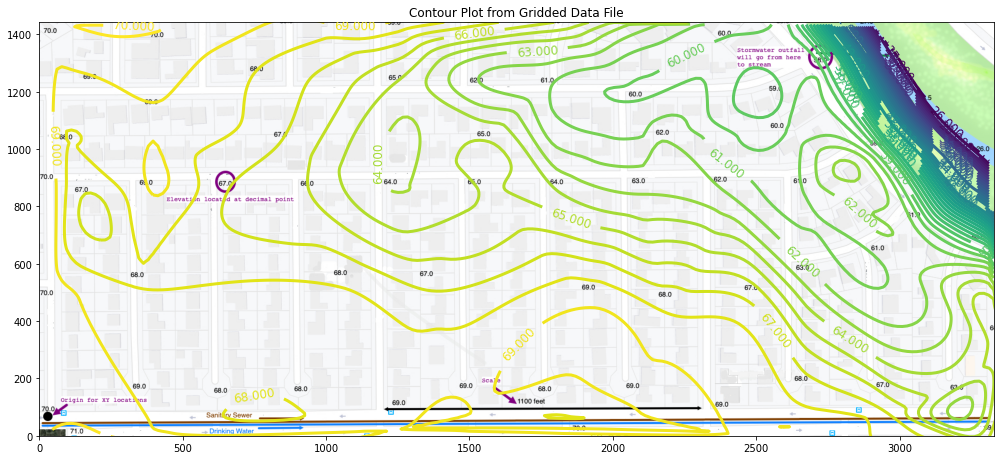

In [1]:
# CCMR from ENGR-1330:
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('XYZSomewhereUSA.txt',sep='\t') # read an ascii file already prepared, delimiter is tabs
#my_xyz = pandas.read_csv('XYZSomewhereUSA.txt',sep=' ') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) #examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use cubic spline interpolation (other choices are nearest and linear)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic', fill_value = 'nan')
# Build the map
flag=True
if flag:
    matplotlib.pyplot.rcParams["figure.figsize"] = [15.0, 6.50] #adjust to make plot bigger, keep the aspect ratio or will fuck things up
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("SomewhereUSABaseMap.png") # base image
fig, ax = matplotlib.pyplot.subplots()
if flag: 
    im = ax.imshow(im, extent=[0, 3361, 0, 1458])# sets X and Y plot window of basemap
#fig.set_size_inches(14, 7)
levels=[]
for i in range(26,71,1):
    levels.append(float(i))
CS = ax.contour(X, Y, Z, levels, linewidths=3)
ax.clabel(CS, inline=2, fontsize=12)
ax.set_title('Contour Plot from Gridded Data File')
ax.set_xlim([0,3328])
ax.set_ylim([0,1442]);